# Yeast
Take RE and genome to run predicted electrophoresis image:
1. Load genome into python
2. Load restriction enzymes into python
3. Match RE sequences to genome sequences
4. Virtually cut at target sequences
5. Group pieces by size
6. Display sequences on virtual gel

List of Restriction Enzymes: https://www.neb.com/tools-and-resources/usage-guidelines/nebuffer-performance-chart-with-restriction-enzymes

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import re
import csv
#import gffpandas

## Step 1
Load Genome

In [2]:
#Load the genome
genome = ""

with open("x.txt",'r') as file:
#with open("strawberry_full.txt",'r') as file:
    lines = file.readlines()
    for line in lines:
        if line[0] != ">" :
            genome = genome + line[:-1]

In [3]:
print(len(genome))

11507974


## Step 2
Load Motif

In [4]:
#magic code that loads a motif
with open('enzymes.csv', newline='') as csvfile:
    enzyme_array = list(csv.reader(csvfile, delimiter=',')) 
    
for i in range(5):
    print(enzyme_array[i])
    
enzymes = {}
for i in range(len(enzyme_array)):
    enzymes[enzyme_array[i][0]] = enzyme_array[i][2]                   

['AatII', '', 'GACGT/C', 'rCutSmartâ„¢ Buffer', '<10', '50*', '50', '100', '80Â°C', '37Â°C', 'B', '', '', '', 'Î» DNA', '']
['AbaSI', '', 'CNNNNNNNNNNN/NNNNNNNNNG', 'rCutSmartâ„¢ Buffer', '25', '50', '50', '100', '65Â°C', '25Â°C', 'C', '', '', '', 'T4 wild-type phage DNA (fully ghmC-modified)', 'e']
['AccI', '', 'GT/MKAC', 'rCutSmartâ„¢ Buffer', '50', '50', '10', '100', '80Â°C', '37Â°C', 'A', '', '', '', 'Î» DNA', '']
['Acc65I', '', 'G/GTACC', 'NEBufferâ„¢ r3.1', '10', '75*', '100', '25', '65Â°C', '37Â°C', 'A', '', '', '', 'pBC4 DNA', '']
['AciI', '', 'CCGC(-3/-1)', 'rCutSmartâ„¢ Buffer', '<10', '25', '100', '100', '65Â°C', '37Â°C', 'A', '', '', '', 'Î» DNA', '']


Single letter codes from https://www.neb.com/tools-and-resources/usage-guidelines/single-letter-codes
* B = C or G or T
* D = A or G or T
* H = A or C or T 
* K = G or T 
* M = A or C 
* N = A or C or G or T 
* R = A or G 
* S = C or G 
* V = A or C or G 
* W = A or T 
* Y = C or T

In [5]:
for enzyme in enzymes:
    print(enzyme + ": " + enzymes[enzyme])

AatII: GACGT/C
AbaSI: CNNNNNNNNNNN/NNNNNNNNNG
AccI: GT/MKAC
Acc65I: G/GTACC
AciI: CCGC(-3/-1)
AclI: AA/CGTT
AcuI: CTGAAG(16/14)
AfeI: AGC/GCT
AflII: C/TTAAG
AflIII: A/CRYGT
AgeI Â§: A/CCGGT
AgeI-HFÂ®: A/CCGGT
AhdI: GACNNN/NNGTC
AleI-v2: CACNN/NNGTG
AluI: AG/CT
AlwI: GGATC(4/5)
AlwNI: CAGNNN/CTG
ApaI: GGGCC/C
ApaLI: G/TGCAC
ApeKI: G/CWGC
ApoI Â§: R/AATTY
ApoI-HF: R/AATTY
AscI: GG/CGCGCC
AseI: AT/TAAT
AsiSI: GCGAT/CGC
AvaI: C/YCGRG
AvaII: G/GWCC
AvrII: C/CTAGG
BaeGI: GKGCM/C
BaeI: (10/15)ACNNNNGTAYC(12/7)
BamHI Â§: G/GATCC
BamHI-HFÂ®: G/GATCC
BanI: G/GYRCC
BanII: GRGCY/C
BbsI Â§: GAAGAC(2/6)
BbsI-HFÂ®: GAAGAC(2/6)
BbvCI: CCTCAGC(-5/-2)
BbvI: GCAGC(8/12)
BccI: CCATC(4/5)
BceAI: ACGGC(12/14)
BcgI: (10/12)CGANNNNNNTGC(12/10)
BciVI: GTATCC(6/5)
BclI Â§: T/GATCA
BclI-HF: T/GATCA
BcoDI: GTCTC(1/5)
BfaI: C/TAG
BfuAI: ACCTGC(4/8)
BglI: GCCNNNN/NGGC
BglII: A/GATCT
BlpI: GC/TNAGC
BmgBI: CACGTC(-3/-3)
BmrI: ACTGGG(5/4)
BmtI Â§: GCTAG/C
BmtI-HFÂ®: GCTAG/C
BpmI: CTGGAG(16/14)
BpuEI: CTTGAG(16/14)
Bpu

In [6]:
#clean up the enzyme sequences and convert them to regex

#delete all the parenthesis
for enzyme in enzymes:
    parenflag = False
    new_sequence = ""
    for character in enzymes[enzyme]:
        if(character == "("):
            parenflag = True
        elif(character == ")"):
            parenflag = False
        elif(not parenflag):
            new_sequence = new_sequence + character;
    enzymes[enzyme] = new_sequence

#convert all the annoying single letter codes a
for enzyme in enzymes:
    enzymes[enzyme] = enzymes[enzyme].replace("/","")
    enzymes[enzyme] = enzymes[enzyme].replace("B","[CGT]")
    enzymes[enzyme] = enzymes[enzyme].replace("D","[AGT]")
    enzymes[enzyme] = enzymes[enzyme].replace("H","[ACT]")
    enzymes[enzyme] = enzymes[enzyme].replace("K","[GT]")
    enzymes[enzyme] = enzymes[enzyme].replace("M","[AC]")
    enzymes[enzyme] = enzymes[enzyme].replace("N","[ACGT]")
    enzymes[enzyme] = enzymes[enzyme].replace("R","[AG]")
    enzymes[enzyme] = enzymes[enzyme].replace("S","[CG]")
    enzymes[enzyme] = enzymes[enzyme].replace("V","[ACG]")
    enzymes[enzyme] = enzymes[enzyme].replace("W","[AT]")
    enzymes[enzyme] = enzymes[enzyme].replace("Y","[CT]")
    
for enzyme in enzymes:
    print(enzyme + ": " + enzymes[enzyme])

AatII: GACGTC
AbaSI: C[ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT][ACGT]G
AccI: GT[AC][GT]AC
Acc65I: GGTACC
AciI: CCGC
AclI: AACGTT
AcuI: CTGAAG
AfeI: AGCGCT
AflII: CTTAAG
AflIII: AC[AG][CT]GT
AgeI Â§: ACCGGT
AgeI-HFÂ®: ACCGGT
AhdI: GAC[ACGT][ACGT][ACGT][ACGT][ACGT]GTC
AleI-v2: CAC[ACGT][ACGT][ACGT][ACGT]GTG
AluI: AGCT
AlwI: GGATC
AlwNI: CAG[ACGT][ACGT][ACGT]CTG
ApaI: GGGCCC
ApaLI: GTGCAC
ApeKI: GC[AT]GC
ApoI Â§: [AG]AATT[CT]
ApoI-HF: [AG]AATT[CT]
AscI: GGCGCGCC
AseI: ATTAAT
AsiSI: GCGATCGC
AvaI: C[CT]CG[AG]G
AvaII: GG[AT]CC
AvrII: CCTAGG
BaeGI: G[GT]GC[AC]C
BaeI: AC[ACGT][ACGT][ACGT][ACGT]GTA[CT]C
BamHI Â§: GGATCC
BamHI-HFÂ®: GGATCC
BanI: GG[CT][AG]CC
BanII: G[AG]GC[CT]C
BbsI Â§: GAAGAC
BbsI-HFÂ®: GAAGAC
BbvCI: CCTCAGC
BbvI: GCAGC
BccI: CCATC
BceAI: ACGGC
BcgI: CGA[ACGT][ACGT][ACGT][ACGT][ACGT][ACGT]TGC
BciVI: GTATCC
BclI Â§: TGATCA
BclI-HF: TGATCA
BcoDI: GTCTC
BfaI: CTAG
BfuAI: ACCTGC
BglI: GCC[ACGT][ACGT][ACGT][AC

## Step 3
Matching

In [7]:
def match(genome, motif): #genome="Hi, my name is Willow" motif = "Wil"
    #print("Finding genome matches with motif: " + motif)
    list_of_fragments = [fragment + motif for fragment in re.split(motif, genome) if fragment]
    list_of_fragments[-1] = list_of_fragments[-1][:-len(motif)] # x[-1][:-3] is everything but the motif
    return list_of_fragments

In [8]:
#test out the match function
#print(len(match(genome, motif)))


In [9]:
# #Make a Histogram of Fragment lengths
# frag_lengths = [len(fragment) for fragment in match(genome, motif)]
# print(frag_lengths)

# fig1 = plt.figure(figsize = (10,5))
# plt.hist(frag_lengths)
# plt.title("Fragment Lengths")
# plt.xlabel("Length (bp)")
# plt.ylabel("Counts")
# plt.show()

## Step 4
Plot a gel

In [8]:
def plotgel(samples, names):
    #find the maximum fragment length
    longest_fragment_length = 0;
    for sample in samples:
        for fragment in sample:
            longest_fragment_length = max(fragment, longest_fragment_length)
    
    ladder = [list(range(0,longest_fragment_length,int(longest_fragment_length/10)))]
    samples = samples + ladder
    name = names + ["ladder"]
    plt.grid()

    #plot them allZ
    for sample_idx in range(len(samples)):
        for fragment in samples[sample_idx]:
            plt.bar(sample_idx,[longest_fragment_length/200],bottom=fragment,color="white")
        
    plt.xticks(range(len(samples)), name)
    plt.title("Genome gel")
    plt.ylabel("Length (bp)")
    plt.ylim(bottom=0)
    plt.gca().set_facecolor('dimgrey')

    plt.show()

In [11]:
# #test code for plotitng
# samples = [[2500, 544, 3242, 2321, 3],[1234],[345,765,44]]
# plotgel(samples)

## Step 5
Put it all together

In [9]:
#for each enzyme, slice up the genome, find out how many fragments it makes, and then add 
    #the number of fragments to an array
good_enzymes = {}
for enzyme in enzymes:
    fragment_lengths = [len(fragment) for fragment in match(genome, enzymes[enzyme])]
    #count how many are shorter than 10kb
    numshorts = 0
    shorts = []
    for fragment in fragment_lengths:
        if(fragment < 10000 and fragment > 10): 
            numshorts += 1
            shorts.append(fragment)
    if(numshorts < 50 and numshorts > 1): 
        good_enzymes[enzyme] = shorts
    

In [10]:
for enzyme in good_enzymes:
    print(enzyme + ": " + str(good_enzymes[enzyme]))

PmeI: [7151, 7152, 1862, 528, 5908, 482, 9287, 3622, 3317, 9857, 8133, 1087, 6820, 7651, 4700, 7604, 5408, 9375, 1668, 9000, 90, 8342, 9963, 9013, 3005, 21, 3968, 3775, 3389, 6964, 2457, 3654, 356, 5812, 9220, 1482, 2230, 7324, 7993, 8967]
RsrII: [9193, 526, 149, 2235, 7206, 6449, 3254, 1721, 902, 1200, 8596, 6759, 1307, 7237]
SbfI Â§: [9035, 3310, 1692, 6480, 6469, 429, 5467, 9355, 1918]
SbfI-HFÂ®: [9035, 3310, 1692, 6480, 6469, 429, 5467, 9355, 1918]
SfiI: [1838, 9648, 1572, 4291]


<IPython.core.display.Javascript object>


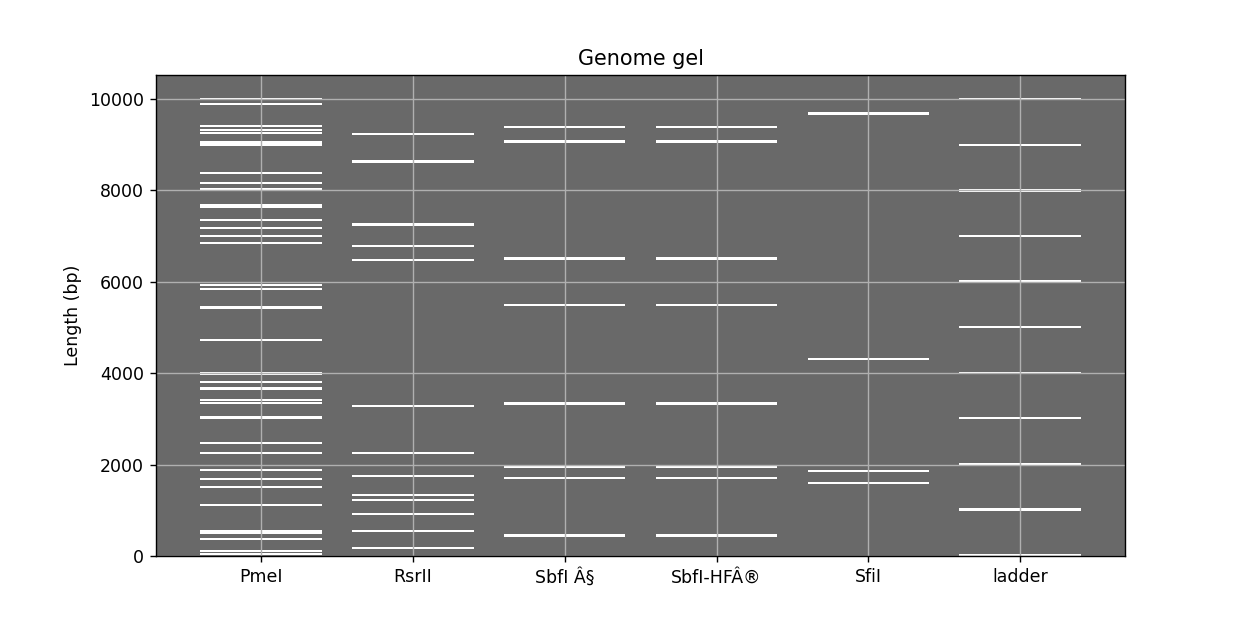

In [11]:
fig2 = plt.subplots(1,1,figsize=(10,5))
flens = [good_enzymes[enzyme] for enzyme in good_enzymes]
plotgel(flens,list(good_enzymes.keys()))

In [15]:
## Not used: this was for testing when we had the really long fragments

# fig3 = plt.subplots(1,1,figsize=(10,5))
# if "I-CeuI" in good_enzymes: good_enzymes.remove("I-CeuI")
# if "I-SceI" in good_enzymes: good_enzymes.remove("I-SceI")
# if "PI-PspI" in good_enzymes: good_enzymes.remove("PI-PspI")
# if "PI-SceI" in good_enzymes: good_enzymes.remove("PI-SceI")
# frag_lengths = [[len(fragment) for fragment in match(genome, enzymes[good_enzymes[i]])] for i in range(len(good_enzymes))]
# plotgel(frag_lengths, good_enzymes)

In [12]:
print("To Purchase: " + str(list(good_enzymes)[2]) + " - " + enzymes[list(good_enzymes)[2]])

To Purchase: SbfI Â§ - CCTGCAGG
